## Numpy



<ol>
  <li>NumPy is a general-purpose array-processing library.</li>
  <li><b>POWERFUL N-DIMENSIONAL ARRAYS:</b> It provides a high-performance multidimensional array object, and tools for working with these arrays.</li>
  <li><b>NUMERICAL COMPUTING TOOLS:</b> NumPy offers comprehensive mathematical functions, random number generators, linear algebra routines and more. </li>
   <li> <b>EASY TO USE:</b> NumPy’s high level syntax makes it accessible and productive for programmers from any background or experience level.</li>
   <li><b>OPEN SOURCE:</b>  NumPy is developed and maintained publicly on GitHub by a diverse community.
 </li>

</ol>





## 1. Import library
we use a shorthand name ``np`` for NumPy.

In [18]:
# import and abbreviation
import numpy as np

In [19]:
print(np.__version__)

1.21.6


## 2. Single-dimensional arrays, behave similar to row vectors

In [20]:
x = np.array([1,2,3,4,5])
# x = np.array({1,2,3,4,5})


print('x =', x)
print('type(x) =', type(x))


x = [1 2 3 4 5]
type(x) = <class 'numpy.ndarray'>


In [21]:
print('x =', x)

y = x + 5
print('y =', y)

z = x * 2
print('z =', z)

x = [1 2 3 4 5]
y = [ 6  7  8  9 10]
z = [ 2  4  6  8 10]


## 3. Matrices: Two-dimensional arrays

In [22]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [23]:
print(A)
C = A + 10
print(C)

# print('')

# D = A * 3
# print(D)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[11 12 13]
 [14 15 16]
 [17 18 19]]


In [24]:
x = np.array([1, 2, 3])

y = np.array([1, 2, 3])

dot_product = np.dot(x, y)

print(dot_product)

14


## 4. Random matrices

In [25]:
A = np.random.rand(5,3)
print(A)

print('')

x = np.random.rand(5)
print(x)

print('\n')

x = np.random.randint(5,10,[2,2])
print(x)

x = np.random.choice([3, 5, 7, 9], size=(3, 5))

print(x)


[[0.56390866 0.59194522 0.35690955]
 [0.91108893 0.76704715 0.31035961]
 [0.63959894 0.51228947 0.15025405]
 [0.24878165 0.08896742 0.22760548]
 [0.45442904 0.97382319 0.24477284]]

[0.22810954 0.68545166 0.78869882 0.48446242 0.26726486]


[[8 9]
 [6 7]]
[[9 5 3 9 3]
 [9 5 7 7 3]
 [7 9 9 3 5]]


## 5. Reshaping matrices

In [41]:
x = np.random.rand(5,4)
print(x)

print('')

y = np.reshape(x,(10,2))
print(y)

[[0.20248811 0.26406037 0.25504038 0.19629949]
 [0.00725479 0.92033638 0.45884953 0.2169795 ]
 [0.78506454 0.74283383 0.61834685 0.07149632]
 [0.8394794  0.47034524 0.7183622  0.27162116]
 [0.60675605 0.52686939 0.90783832 0.85650493]]

[[0.20248811 0.26406037]
 [0.25504038 0.19629949]
 [0.00725479 0.92033638]
 [0.45884953 0.2169795 ]
 [0.78506454 0.74283383]
 [0.61834685 0.07149632]
 [0.8394794  0.47034524]
 [0.7183622  0.27162116]
 [0.60675605 0.52686939]
 [0.90783832 0.85650493]]


## 5.1. Numpy broadcasting


*   The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.
*   Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes.
*   Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python.
*   It does this without making needless copies of data and usually leads to efficient algorithm implementations.
*   There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.
*   NumPy operations are usually done on pairs of arrays on an element-by-element basis. In the simplest case, the two arrays must have exactly the same shape, as in the following example:

In [27]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b

array([2., 4., 6.])

NumPy’s broadcasting rule relaxes this constraint when the arrays’ shapes meet certain constraints. The simplest broadcasting example occurs when an array and a scalar value are combined in an operation:

In [36]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
print(a * b)
# print(a + b) #The broadcasting concept is valid for arithmatic operations


[2. 4. 6.]


The result is equivalent to the previous example where b was an array. We can think of the scalar b being stretched during the arithmetic operation into an array with the same shape as a. The new elements in b, as shown in Figure below, are simply copies of the original scalar. The stretching analogy is only conceptual. NumPy is smart enough to use the original scalar value without actually making copies so that broadcasting operations are as memory and computationally efficient as possible.

A scalar is broadcast to match the shape of the 1-d array it is being multiplied to.
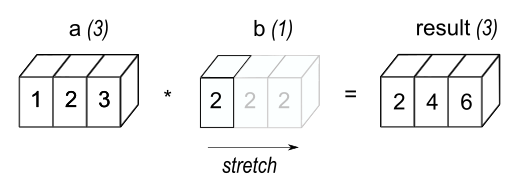

In the simplest example of broadcasting, the scalar b is stretched to become an array of same shape as a so the shapes are compatible for element-by-element multiplication.

The code in the second example is more efficient than that in the first because broadcasting moves less memory around during the multiplication (b is a scalar rather than an array).

## General Broadcasting Rules

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimension and works its way left. Two dimensions are compatible when



1.   they are equal, or
2.   one of them is 1.


If these conditions are not met, a `ValueError: operands could not be broadcast together` exception is thrown, indicating that the arrays have incompatible shapes.

Input arrays do not need to have the same number of dimensions. The resulting array will have the same number of dimensions as the input array with the greatest number of dimensions, where the size of each dimension is the largest size of the corresponding dimension among the input arrays. Note that missing dimensions are assumed to have size one.



*   A      (4d array):  8 x 1 x 6 x 1
*   B      (3d array):      7 x 1 x 5
*   Result (4d array):  8 x 7 x 6 x 5



*   A      (2d array):  5 x 4
*   B      (1d array):      1
*   Result (2d array):  5 x 4

*   A      (2d array):  5 x 4
*   B      (1d array):      1
*   Result (2d array):  5 x 4

*   A      (2d array):  5 x 4
*   B      (1d array):      4
*   Result (2d array):  5 x 4

*   A      (3d array):  15 x 3 x 5
*   B      (3d array):  15 x 1 x 5
*   Result (3d array):  15 x 3 x 5

*   A      (3d array):  15 x 3 x 5
*   B      (2d array):       3 x 5
*   Result (3d array):  15 x 3 x 5

*   A      (3d array):  15 x 3 x 5
*   B      (2d array):       3 x 1
*   Result (3d array):  15 x 3 x 5

Here are examples of shapes that do not broadcast:

*   A      (1d array):  3
*   B      (1d array):  4 # trailing dimensions do not match

*   A      (2d array):      2 x 1
*   B      (3d array):  8 x 4 x 3 # second from last dimensions mismatched

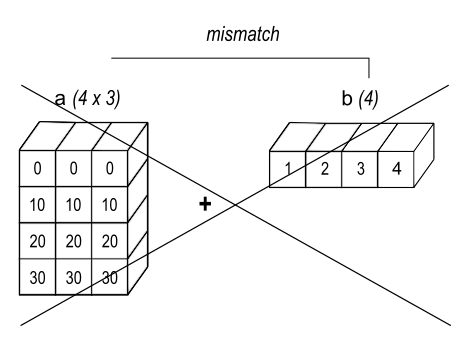

When the trailing dimensions of the arrays are unequal, broadcasting fails because it is impossible to align the values in the rows of the 1st array with the elements of the 2nd arrays for element-by-element addition.

Broadcasting is a powerful tool for writing short and usually intuitive code that does its computations very efficiently in C. However, there are cases when broadcasting uses unnecessarily large amounts of memory for a particular algorithm. In these cases, it is better to write the algorithm’s outer loop in Python. This may also produce more readable code, as algorithms that use broadcasting tend to become more difficult to interpret as the number of dimensions in the broadcast increases

In [29]:
A = np.random.rand(5,3)
print(A)

print('')

x = np.random.rand(5)
print(x)

#Will not work
# print(A + x)

y = np.reshape(x,(5,1))
print(y)

# print('')

print(A + y)

[[0.44824208 0.39964602 0.48669222]
 [0.32570431 0.3322307  0.95457794]
 [0.47456858 0.92718402 0.19478696]
 [0.72229315 0.16437049 0.94689045]
 [0.50690991 0.43167603 0.22741166]]

[0.71411509 0.16677126 0.45822528 0.90094674 0.03415244]
[[0.71411509]
 [0.16677126]
 [0.45822528]
 [0.90094674]
 [0.03415244]]
[[1.16235717 1.11376111 1.20080731]
 [0.49247557 0.49900197 1.1213492 ]
 [0.93279386 1.3854093  0.65301224]
 [1.62323989 1.06531723 1.84783719]
 [0.54106235 0.46582847 0.2615641 ]]


## 6. Dimension and shape of numpy arrays

In [30]:
A = np.random.rand(5,3)
print(A.ndim) #number of dimensions of the array/matrix 
print(A.shape)#dimensions of the array/matrix 

print('')

x = np.random.rand(5)
print(x.ndim)#number of dimensions of the array/matrix 
print(x.shape)#dimensions of the array/matrix 

2
(5, 3)

1
(5,)


## 7. Special Matrices

In [37]:
print(np.zeros((3,2)))

print('')

print(4.5*np.ones((2,3)))

print('')

print(np.eye(3))

[[0. 0.]
 [0. 0.]
 [0. 0.]]

[[4.5 4.5 4.5]
 [4.5 4.5 4.5]]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [32]:
A = np.arange(9) # Return evenly spaced values within a given interval.
print(A)

A = np.arange(9,14) # Return evenly spaced values within a given interval.
print(A)

A = np.arange(9,14,2) # Return evenly spaced values within a given interval.
print(A)

[0 1 2 3 4 5 6 7 8]
[ 9 10 11 12 13]
[ 9 11 13]


In [33]:
A = np.arange(9)
B = np.reshape(A, (3,3))

print(B)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


## 8. Numpy array operations: max, argmax, min, argmin, sort, argsort

In [34]:
x = np.array([5,4,1,8,7,3,9,2,6])

print(np.max(x))#value of the maximum element
print(np.argmax(x)) #index of the maximum element

print('')
print(np.min(x))
print(np.argmin(x))

# print('')
# x=np.sort(x)
print("np.sort(x)",np.sort(x))
print(x)
print("np.argsort(x)",np.argsort(x))

9
6

1
2
np.sort(x) [1 2 3 4 5 6 7 8 9]
[5 4 1 8 7 3 9 2 6]
np.argsort(x) [2 7 5 1 0 8 4 3 6]


# 9. Boolean Element-Wise Operations

In [35]:
x = np.random.rand(3,3)
print(x)

print(x>0.5)

[[0.43931204 0.17489531 0.53220461]
 [0.74942117 0.23284761 0.51456763]
 [0.15420391 0.69762341 0.28108812]]
[[False False  True]
 [ True False  True]
 [False  True False]]


## References

<a href="https://numpy.org/doc/stable/user/index.html">a)  Numpy documentation</a>